 <h1> <p> <center> Análise Exploratória de desempenho em exames 

<h2> 1. Perspectiva do Projeto 

<h2> Desempenho Escolar

<p> Um dos Aspectos Relevantes para o Governo Federal é o desempenho escolar juvenil, visto que tal parcela populacional representa as perspectivas futuras do mercado de trabalho. Assim, o Governo Federal dos Estados Unidos Buscará entender as características que influenciam o desempenho dos alunos.  
    

<h2> 2. Identificação e tratamento da base de dados 

Importando as Bibliotecas necessárias

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np
import seaborn as sns 
# Para ter melhor print
from IPython.display import display

Identificando a Base de dados 

In [64]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Para esse caso, vou transformar o desempenho nos 3 exames em 'desempenho médio': 

In [71]:
df['score'] = ((df['math score'] + df['reading score'] + df['writing score']) / 3) 
df['score'] = df['score'].round()


Tratamento dos Tipos das Series 

In [72]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
score                           float64
dtype: object

In [73]:
df.gender = df.gender.astype('category') # Qualitativa nominal 
df['race/ethnicity']= df['race/ethnicity'].astype('category') #Qualitativa nominal 
df.lunch = df.lunch.astype('category') #Qualitativa nominal 
df['test preparation course'] = df['test preparation course'].astype('category') #Qualitativa nominal 


df['parental level of education'] = pd.Categorical(df['parental level of education'],  # Por ser qualitativa ordional
                                                     categories=['some high school', 'high school',
                                                                 'some college',
                                                                 "associate's degree","bachelor's degree","master's degree"],
                                                      ordered=True)
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
score                           float64
dtype: object

## 3. Análise Exploratória 

Nessa etapa, vou buscar tirar conclusões acerca das features que mais influenciam a variável o resultado da variável target 

### 3.1 Análise pelo Gênero 

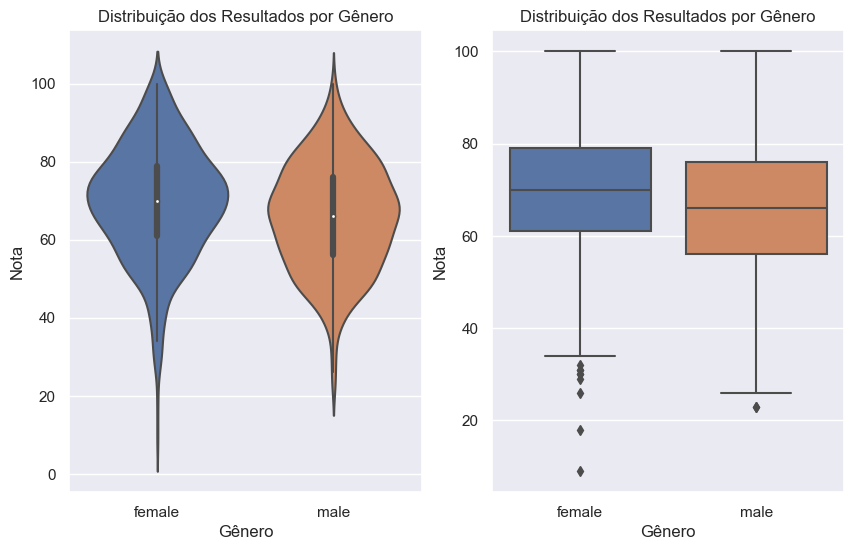

In [74]:
#Vamos, aqui, utilizar-se da Função ViolinPlot para visualizar os dados de distribuição dos scores para cada gênero 

sns.set(style = 'darkgrid')
plt.figure(figsize=(10,6))

plt.subplot(121)
sns.violinplot(x = df['gender'] , y = df.score , data = df)
plt.title('Distribuição dos Resultados por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota')
plt.subplot(122)
sns.boxplot(x = df['gender'] , y = df.score , data = df)
plt.title('Distribuição dos Resultados por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Nota')
plt.show()

NameError: name 'width' is not defined

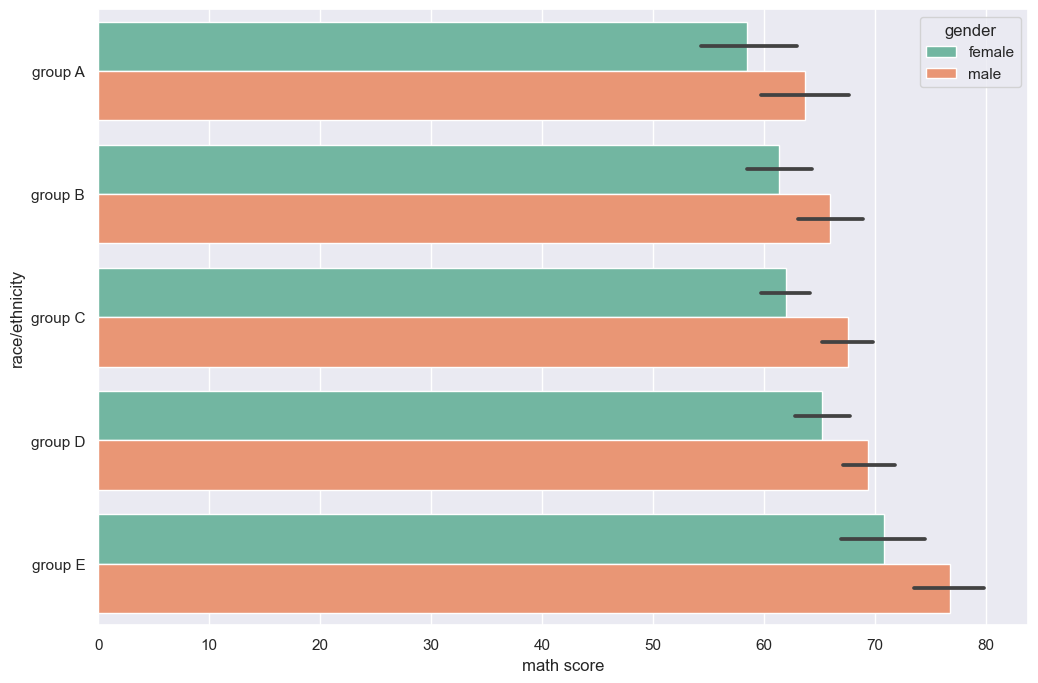

In [106]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='math score', y='race/ethnicity', hue='gender', data=df, palette='Set2')

# Iterar sobre as barras
for p in bar_plot.patches:
    # Calcular a altura da barra para determinar a posição do texto
    height = p.get_height()
    # Adicionar o texto
    bar_plot.text(p.get_x() + p.get_height() / 2., width + 0.1, '{:1.2f}'.format(widht), ha="center", va="bottom")

# Adicionar título e rótulos aos eixos
plt.title('Média dos Escores de Matemática por Raça/Etnia e Gênero')
plt.xlabel('Raça/Etnia')
plt.ylabel('Média do Escore de Matemática')

# Mostrar o gráfico
plt.show()